In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 6]

In [2]:
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
df12 = pd.read_excel('2012.xls')
df13 = pd.read_excel('2013.xls')
df14 = pd.read_excel('2014.xls')
df15 = pd.read_excel('2015.xls')
df16 = pd.read_excel('2016.xls')
df17 = pd.read_excel('2017.xls')
df18 = pd.read_excel('2018.xls')
df19 = pd.read_excel('2019.xls')

In [5]:
df12.shape

(70, 13)

In [6]:
df12['월별합계'] = df12.sum(axis=1)
df13['월별합계'] = df13.sum(axis=1)
df14['월별합계'] = df14.sum(axis=1)
df15['월별합계'] = df15.sum(axis=1)
df16['월별합계'] = df16.sum(axis=1)
df17['월별합계'] = df17.sum(axis=1)
df18['월별합계'] = df18.sum(axis=1)
df19['월별합계'] = df19.sum(axis=1)

In [7]:
df12['연도'] = '2012'
df13['연도'] = '2013'
df14['연도'] = '2014'
df15['연도'] = '2015'
df16['연도'] = '2016'
df17['연도'] = '2017'
df18['연도'] = '2018'
df19['연도'] = '2019'

In [8]:
concat = pd.concat([df12,df13,df14,df15,df16,df17,df18,df19], axis=0)
print(concat.columns)
print(concat.shape)

Index(['분류', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월',
       '11월', '12월', '월별합계', '연도'],
      dtype='object')
(560, 15)


In [9]:
concat1 = concat.loc[:,['분류','월별합계','연도']]
concat1

,분류,월별합계,연도
0,공용관리비,10168,2012
1,일반관리비,3619,2012
2,인건비,3378,2012
3,급여,0,2012
4,제수당,0,2012
...,...,...,...
65,월사용액,0,2019
66,충당금잔액,0,2019
67,적립요율(%),0,2019
68,합계,23995,2019


In [10]:
concat11 = pd.pivot(concat1, index='분류', columns='연도', values='월별합계')
concat11 = concat11.T

In [11]:
concat11 = concat11.reset_index()
concat11.columns

Index(['연도', '가스공용', '가스사용료', '가스전용', '개별사용료', '건강보험료', '건물보험료', '경비비',
       '고용보험료', '공과금중전기료', '공용관리비', '관리용품구입비', '교육훈련비', '국민연금', '그밖의부대비용',
       '급여', '급탕공용', '급탕비', '급탕전용', '기타차량유지비', '난방공용', '난방비', '난방전용', '도서인쇄비',
       '보험료', '산재보험료', '상여금', '생활폐기물수수료', '선거관리위원회운영비', '소독비', '수도공용', '수도료',
       '수도전용', '수리비', '수선비', '수선유지비', '승강기유지비', '시설유지비', '식대등복리후생비', '안전점검비',
       '여비교통비', '연료비', '우편료', '월사용액', '위탁관리수수료', '인건비', '일반관리비', '일반사무용품비',
       '입주자대표회의운영비', '잡비', '잡수입', '장기수선충당금월부과액', '재해예방비', '적립요율(%)', '전기공용',
       '전기료', '전기전용', '전문가자문비등', '정화조오물수수료', '제사무비', '제세공과금', '제세공과금등', '제수당',
       '지능형홈네트워크설비유지비', '차량유지비', '청소비', '충당금잔액', '통신료', '퇴직금', '피복비', '합계'],
      dtype='object', name='분류')

In [12]:
public = concat11.loc[:,['연도','일반관리비','청소비','경비비','소독비','승강기유지비','난방비','급탕비','수선유지비','위탁관리수수료','지능형홈네트워크설비유지비']]

In [13]:
public = public.set_index('연도')

In [14]:
general = concat11.loc[:,['연도','인건비','제사무비','제세공과금','피복비','교육훈련비','차량유지비','그밖의부대비용']]

In [15]:
general = general.set_index('연도')

In [16]:
public.style.background_gradient(cmap='summer')

분류,일반관리비,청소비,경비비,소독비,승강기유지비,난방비,급탕비,수선유지비,위탁관리수수료,지능형홈네트워크설비유지비
연도,,,,,,,,,,
2012,3619,1290,4282,126,216,5184,3856,639,0,0
2013,4425,1672,5280,154,264,6292,4612,726,0,0
2014,5144,1856,5892,168,288,10816,9195,1025,0,0
2015,5267,1974,6283,168,288,6001,4430,795,0,0
2016,5610,2219,6418,168,288,5439,3990,688,0,0
2017,5860,2471,6832,168,288,5931,3519,210,0,0
2018,6205,2750,7545,108,240,5973,3383,31,0,0
2019,5693,2839,7081,115,220,4271,2931,9,0,0


In [17]:
public = public.loc[:,['일반관리비','청소비','경비비','소독비','승강기유지비','난방비','급탕비','수선유지비']]
public

분류,일반관리비,청소비,경비비,소독비,승강기유지비,난방비,급탕비,수선유지비
연도,,,,,,,,
2012,3619,1290,4282,126,216,5184,3856,639
2013,4425,1672,5280,154,264,6292,4612,726
2014,5144,1856,5892,168,288,10816,9195,1025
2015,5267,1974,6283,168,288,6001,4430,795
2016,5610,2219,6418,168,288,5439,3990,688
2017,5860,2471,6832,168,288,5931,3519,210
2018,6205,2750,7545,108,240,5973,3383,31
2019,5693,2839,7081,115,220,4271,2931,9


In [18]:
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(public)
public_fitted = min_max_scaler.transform(public)
public2 = pd.DataFrame(public_fitted, columns=['일반관리비','청소비','경비비','소독비','승강기유지비','난방비','급탕비','수선유지비'],
                      index=['2012','2013','2014','2015','2016','2017','2018','2019'])

In [19]:
public2.corr()

,일반관리비,청소비,경비비,소독비,승강기유지비,난방비,급탕비,수선유지비
일반관리비,1.000000,0.921678,0.983430,-0.028953,0.302179,-0.035920,-0.178994,-0.551735
청소비,0.921678,1.000000,0.964002,-0.328901,-0.047447,-0.283840,-0.398636,-0.790485
경비비,0.983430,0.964002,1.000000,-0.175690,0.154932,-0.133690,-0.271631,-0.652982
소독비,-0.028953,-0.328901,-0.175690,1.000000,0.921151,0.456542,0.479470,0.685450
승강기유지비,0.302179,-0.047447,0.154932,0.921151,1.000000,0.508048,0.458358,0.517049
난방비,-0.035920,-0.283840,-0.133690,0.456542,0.508048,1.000000,0.969913,0.619961
급탕비,-0.178994,-0.398636,-0.271631,0.479470,0.458358,0.969913,1.000000,0.733869
수선유지비,-0.551735,-0.790485,-0.652982,0.685450,0.517049,0.619961,0.733869,1.000000


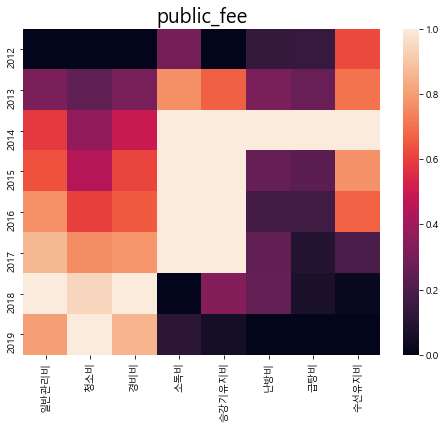

In [20]:
ax = sns.heatmap(public2)
plt.title('public_fee', fontsize=20)
plt.show() 

In [21]:
general.style.background_gradient(cmap='summer')

분류,인건비,제사무비,제세공과금,피복비,교육훈련비,차량유지비,그밖의부대비용
연도,,,,,,,
2012,3378,56,187,0,0,0,0
2013,4148,125,151,0,0,0,0
2014,4859,187,62,0,0,0,36
2015,4971,177,41,0,5,0,72
2016,5300,190,44,0,2,0,72
2017,5546,202,37,0,2,0,72
2018,5870,222,38,0,1,0,72
2019,5380,208,39,0,0,0,66


In [22]:
general = general.loc[:,['인건비','제사무비','제세공과금','교육훈련비','그밖의부대비용']]
general

분류,인건비,제사무비,제세공과금,교육훈련비,그밖의부대비용
연도,,,,,
2012,3378,56,187,0,0
2013,4148,125,151,0,0
2014,4859,187,62,0,36
2015,4971,177,41,5,72
2016,5300,190,44,2,72
2017,5546,202,37,2,72
2018,5870,222,38,1,72
2019,5380,208,39,0,66


In [23]:
min_max_scaler2 = MinMaxScaler()
fitted2 = min_max_scaler2.fit(general)
general_fitted = min_max_scaler2.transform(general)
general2 = pd.DataFrame(general_fitted, columns=['인건비','제사무비','제세공과금','교육훈련비','그밖의부대비용'],
                      index=['2012','2013','2014','2015','2016','2017','2018','2019'])

In [24]:
general2.corr()

,인건비,제사무비,제세공과금,교육훈련비,그밖의부대비용
인건비,1.000000,0.977641,-0.944808,0.310929,0.910174
제사무비,0.977641,1.000000,-0.957481,0.271717,0.866999
제세공과금,-0.944808,-0.957481,1.000000,-0.471568,-0.953632
교육훈련비,0.310929,0.271717,-0.471568,1.000000,0.583859
그밖의부대비용,0.910174,0.866999,-0.953632,0.583859,1.000000


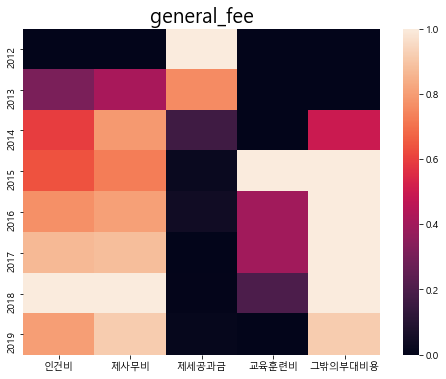

In [25]:
ax2 = sns.heatmap(general2)
plt.title('general_fee', fontsize=20)
plt.show() 

In [36]:
public['합계'] = public[['일반관리비','청소비','경비비','소독비','승강기유지비','난방비','급탕비','수선유지비']].sum(axis=1)
public = public.reset_index()

<AxesSubplot:xlabel='연도'>

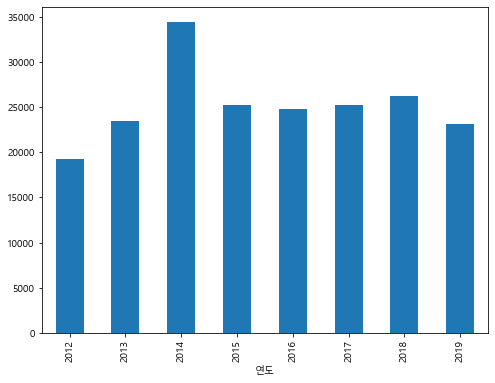

In [27]:
public['합계'].plot(kind='bar')

<AxesSubplot:xlabel='연도'>

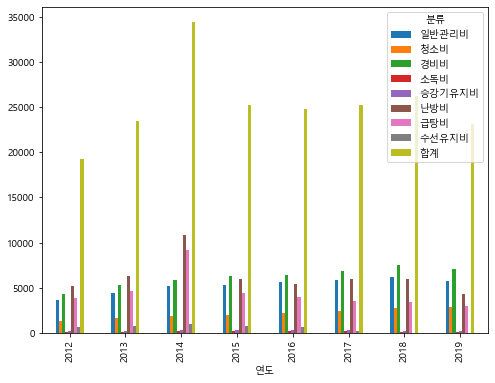

In [28]:
public.plot(kind='bar')
# 2014년 난방비, 급탕비 증가로 공용관리비 대폭 상승

In [29]:
general['합계'] = general[['인건비','제사무비','제세공과금','교육훈련비','그밖의부대비용']].sum(axis=1)
general.reset_index()

분류,연도,인건비,제사무비,제세공과금,교육훈련비,그밖의부대비용,합계
0,2012,3378,56,187,0,0,3621
1,2013,4148,125,151,0,0,4424
2,2014,4859,187,62,0,36,5144
3,2015,4971,177,41,5,72,5266
4,2016,5300,190,44,2,72,5608
5,2017,5546,202,37,2,72,5859
6,2018,5870,222,38,1,72,6203
7,2019,5380,208,39,0,66,5693


<AxesSubplot:xlabel='연도'>

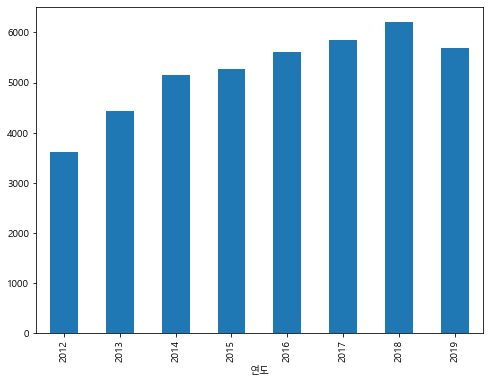

In [30]:
general['합계'].plot(kind='bar')

<AxesSubplot:xlabel='연도'>

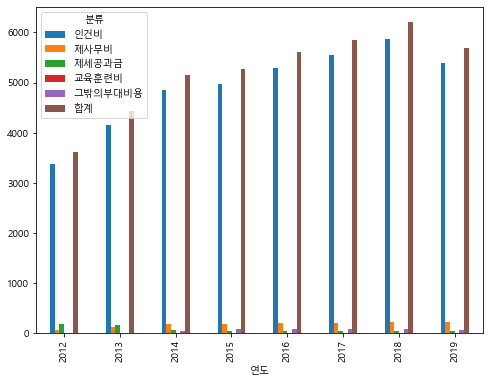

In [31]:
general.plot(kind='bar') # 2019년 인건비 감소로 합계 감소 > 인건비가 일반관리비 중요 요소

([<matplotlib.patches.Wedge at 0x15520f9a7c8>,
 [Text(-1.082669071428822, 0.1944933977580022, '인건비'),
  Text(1.0650383286276521, -0.27512426020621505, '제사무비'),
  Text(1.0939302328475875, -0.11539777147771509, '제세공과금'),
  Text(1.09806329484379, -0.0652456934732109, '교육훈련비'),
  Text(1.099527897959194, -0.03222423947025529, '그밖의부대비용')])

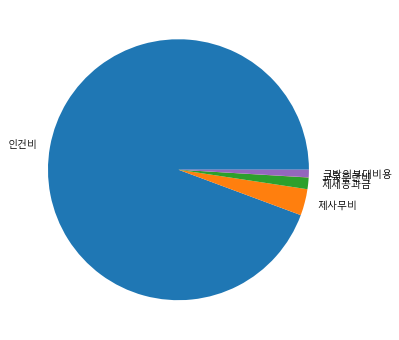

In [32]:
general_por = general[['인건비','제사무비','제세공과금','교육훈련비','그밖의부대비용']].sum(axis=0)
general_por = pd.DataFrame(general_por).reset_index()
plt.pie(general_por[0],labels = general_por['분류']) 

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [58]:
public.to_csv('public.csv', index=False, encoding='utf-8')

In [61]:
trainData = np.genfromtxt('public.csv',delimiter=',', skip_header=1, encoding='utf-8')

In [62]:
x_train=trainData[:,:-1]
y_train=trainData[:,-1]

In [63]:
ridge_alpha = 1
lasso_alpha = 0.1

linear = LinearRegression()
ridge = Ridge(alpha = ridge_alpha)
lasso = Lasso(alpha = lasso_alpha)

In [65]:
linear.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [66]:
linear_y_hat = linear.predict(X_test)
ridge_y_hat = ridge.predict(X_test)
lasso_y_hat = lasso.predict(X_test)

linear_r2, ridge_r2, lasso_r2 = r2_score(y_test,linear_y_hat), r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
linear_MSE, ridge_MSE, lasso_MSE = mean_squared_error(y_test,linear_y_hat), mean_squared_error(y_test,ridge_y_hat), mean_squared_error(y_test,lasso_y_hat)
linear_MAE, ridge_MAE, lasso_MAE = mean_absolute_error(y_test,linear_y_hat), mean_absolute_error(y_test,ridge_y_hat), mean_absolute_error(y_test,lasso_y_hat)

print('R2 score - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_r2, ridge_r2, lasso_r2))
print('MSE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MSE, ridge_MSE, lasso_MSE))
print('MAE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MAE, ridge_MAE, lasso_MAE))

NameError: name 'X_test' is not defined